In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier , GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [14]:
#Importing the dataset into pandas framework
Dataset = pd.read_csv("Dataset-Vr 6 test.csv" )
Dataset.head()

,Death_Reason,Hospital_Name,ID,Addmission_code,Age,BMI,LOS,Average_Daily_Use_Cigarettes,Hookah_Consumption,SystolicBP,...,Cancers,Cardiovascular_Disease,CKD,COPD,Immunosuppressant_Drugs,Antihypertensive_drug,Pantoprazole,Hospitalization_14_days_ago,ICU_admission,Death
0,NaN,Imam Khomeini Complex,1,1234,NaN,20.5,7.0,0.0,0,NaN,...,0,0,0,0,0,1,0,NaN,1.0,1
1,NaN,Shariati Hospital,2,51485,74.0,26.7,2.0,0.0,0,40.0,...,0,1,1,0,0,0,1,1.0,1.0,1
2,NaN,Baharlou Hospital,3,325467,51.0,29.1,173.0,0.0,0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,1
3,NaN,Baharlou Hospital,4,339568,64.0,41.0,6.0,0.0,0,136.0,...,0,0,0,0,0,0,0,0.0,1.0,0
4,NaN,Baharlou Hospital,5,339655,20.0,NaN,8.0,0.0,0,113.0,...,0,0,0,0,0,0,0,0.0,NaN,1


In [15]:
display(Dataset)

,Death_Reason,Hospital_Name,ID,Addmission_code,Age,BMI,LOS,Average_Daily_Use_Cigarettes,Hookah_Consumption,SystolicBP,...,Cancers,Cardiovascular_Disease,CKD,COPD,Immunosuppressant_Drugs,Antihypertensive_drug,Pantoprazole,Hospitalization_14_days_ago,ICU_admission,Death
0,NaN,Imam Khomeini Complex,1,1234,NaN,20.5,7.0,0.0,0,NaN,...,0,0,0,0,0,1,0,NaN,1.0,1
1,NaN,Shariati Hospital,2,51485,74.0,26.7,2.0,0.0,0,40.0,...,0,1,1,0,0,0,1,1.0,1.0,1
2,NaN,Baharlou Hospital,3,325467,51.0,29.1,173.0,0.0,0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,1
3,NaN,Baharlou Hospital,4,339568,64.0,41.0,6.0,0.0,0,136.0,...,0,0,0,0,0,0,0,0.0,1.0,0
4,NaN,Baharlou Hospital,5,339655,20.0,NaN,8.0,0.0,0,113.0,...,0,0,0,0,0,0,0,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,NaN,Imam Khomeini Complex,807,11109329,66.0,NaN,4.0,0.0,0,NaN,...,0,0,0,0,0,0,1,NaN,2.0,0
674,NaN,Imam Khomeini Complex,808,11147213,66.0,NaN,7.0,0.0,0,135.0,...,1,0,0,0,0,1,1,NaN,2.0,0
675,NaN,Imam Khomeini Complex,811,11233326,NaN,NaN,3.0,0.0,0,145.0,...,1,0,0,1,0,0,0,NaN,2.0,0
676,NaN,Imam Khomeini Complex,812,11266958,35.0,NaN,5.0,0.0,0,120.0,...,0,0,0,0,0,0,0,NaN,2.0,0


In [16]:
#Checking the number of null values in each column
Dataset.isnull().sum()

Death_Reason                      612
Hospital_Name                       0
ID                                  0
Addmission_code                     0
Age                                 8
BMI                               276
LOS                                 9
Average_Daily_Use_Cigarettes        0
Hookah_Consumption                  0
SystolicBP                         70
DiastolicBP                        85
Respiratory_rate                  120
Oxygen_Saturation_Percent          44
Intubation_Duration_Day             0
ICU_LOS                             0
Total_Lung_Involvement_Percent      8
NIV_Duration_Day                    0
Total_Lung_Involvement_Rank         8
Sex                                 1
Current_Smoking                   323
History_hookah                      0
Drug_history                        0
Sweating                            0
Fever                               0
Dyspnea                             0
Chestpain                           0
Abnormal_Lun

In [17]:
#Calculating the missing values of dataset and dropping the columns related to after discharge
Dataset.drop("LOS", axis=1, inplace = True)
Dataset.drop("ICU_LOS", axis=1, inplace = True)
Dataset.isnull().sum()

Death_Reason                      612
Hospital_Name                       0
ID                                  0
Addmission_code                     0
Age                                 8
BMI                               276
Average_Daily_Use_Cigarettes        0
Hookah_Consumption                  0
SystolicBP                         70
DiastolicBP                        85
Respiratory_rate                  120
Oxygen_Saturation_Percent          44
Intubation_Duration_Day             0
Total_Lung_Involvement_Percent      8
NIV_Duration_Day                    0
Total_Lung_Involvement_Rank         8
Sex                                 1
Current_Smoking                   323
History_hookah                      0
Drug_history                        0
Sweating                            0
Fever                               0
Dyspnea                             0
Chestpain                           0
Abnormal_Lung_Signs                 0
Diabetes                            0
Hypertension

In [18]:
#Dropping irrelevent features e.g. Death reason, ID , ...
Dataset.drop("Death_Reason", axis=1, inplace = True)
Dataset.drop("ID", axis=1, inplace = True)
Dataset.drop("Addmission_code", axis=1, inplace = True)
Dataset = Dataset[Dataset["Death"].notna()]
Dataset.tail()
Dataset.isnull().sum()

Hospital_Name                       0
Age                                 8
BMI                               276
Average_Daily_Use_Cigarettes        0
Hookah_Consumption                  0
SystolicBP                         70
DiastolicBP                        85
Respiratory_rate                  120
Oxygen_Saturation_Percent          44
Intubation_Duration_Day             0
Total_Lung_Involvement_Percent      8
NIV_Duration_Day                    0
Total_Lung_Involvement_Rank         8
Sex                                 1
Current_Smoking                   323
History_hookah                      0
Drug_history                        0
Sweating                            0
Fever                               0
Dyspnea                             0
Chestpain                           0
Abnormal_Lung_Signs                 0
Diabetes                            0
Hypertension                        0
Cancers                             0
Cardiovascular_Disease              0
CKD         

In [19]:
#Calculating the percentage of missing values in each column
print('Percent of missing "Age" records is %.2f%%' %((Dataset['Age'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "BMI" records is %.2f%%' %((Dataset['BMI'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "SystolicBP" records is %.2f%%' %((Dataset['SystolicBP'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "DiastolicBP" records is %.2f%%' %((Dataset['DiastolicBP'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Respiratory_rate" records is %.2f%%' %((Dataset['Respiratory_rate'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Oxygen_Saturation_Percent" records is %.2f%%' %((Dataset['Oxygen_Saturation_Percent'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Total_Lung_Involvement_Percent" records is %.2f%%' %((Dataset['Total_Lung_Involvement_Percent'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Total_Lung_Involvement_Rank" records is %.2f%%' %((Dataset['Total_Lung_Involvement_Rank'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Sex" records is %.2f%%' %((Dataset['Sex'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Current_Smoking" records is %.2f%%' %((Dataset['Current_Smoking'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Hospitalization_14_days_ago" records is %.2f%%' %((Dataset['Hospitalization_14_days_ago'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "ICU_admission" records is %.2f%%' %((Dataset['ICU_admission'].isnull().sum()/Dataset.shape[0])*100))

Percent of missing "Age" records is 1.18%
Percent of missing "BMI" records is 40.71%
Percent of missing "SystolicBP" records is 10.32%
Percent of missing "DiastolicBP" records is 12.54%
Percent of missing "Respiratory_rate" records is 17.70%
Percent of missing "Oxygen_Saturation_Percent" records is 6.49%
Percent of missing "Total_Lung_Involvement_Percent" records is 1.18%
Percent of missing "Total_Lung_Involvement_Rank" records is 1.18%
Percent of missing "Sex" records is 0.15%
Percent of missing "Current_Smoking" records is 47.64%
Percent of missing "Hospitalization_14_days_ago" records is 31.42%
Percent of missing "ICU_admission" records is 1.47%


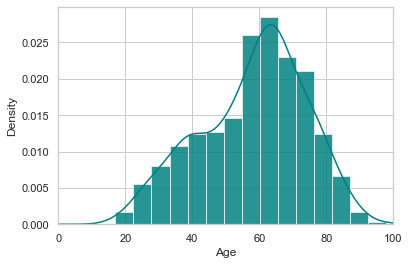

In [16]:
#Visualizing the distribution of variables
ax = Dataset["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(0,100)
plt.show()

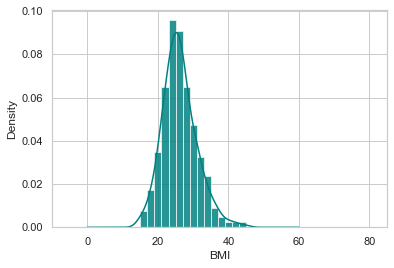

In [17]:
#Visualizing the distribution of variables
ax = Dataset["BMI"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["BMI"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["BMI"].plot(kind='density', color='teal')
ax.set(xlabel='BMI')
plt.xlim(-10,85)
plt.show()

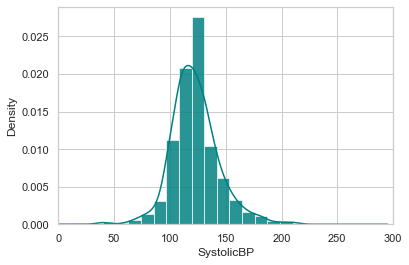

In [18]:
#Visualizing the distribution of variables
ax = Dataset["SystolicBP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["SystolicBP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["SystolicBP"].plot(kind='density', color='teal')
ax.set(xlabel='SystolicBP')
plt.xlim(0,300)
plt.show()

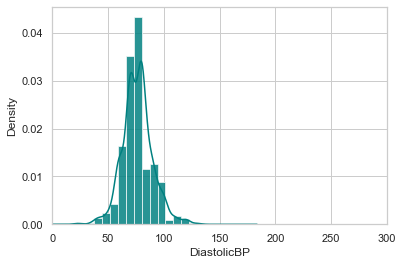

In [19]:
#Visualizing the distribution of variables
ax = Dataset["DiastolicBP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["DiastolicBP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["DiastolicBP"].plot(kind='density', color='teal')
ax.set(xlabel='DiastolicBP')
plt.xlim(0,300)
plt.show()

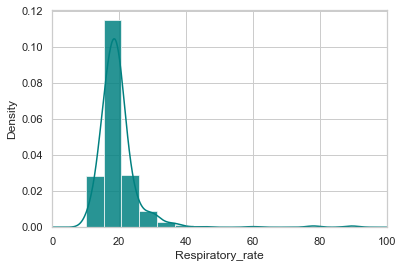

In [20]:
#Visualizing the distribution of variables
ax = Dataset["Respiratory_rate"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Respiratory_rate"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Respiratory_rate"].plot(kind='density', color='teal')
ax.set(xlabel='Respiratory_rate')
plt.xlim(0,100)
plt.show()

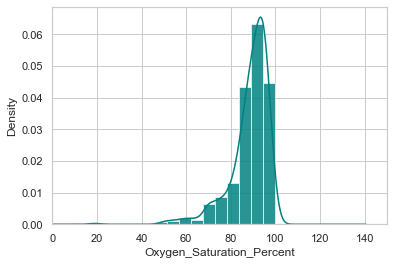

In [21]:
#Visualizing the distribution of variables
ax = Dataset["Oxygen_Saturation_Percent"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Oxygen_Saturation_Percent"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Oxygen_Saturation_Percent"].plot(kind='density', color='teal')
ax.set(xlabel='Oxygen_Saturation_Percent')
plt.xlim(0,150)
plt.show()

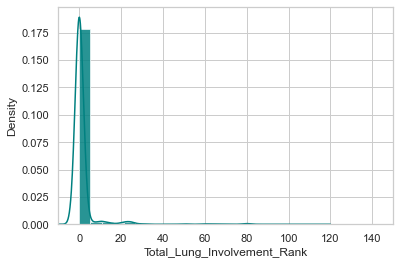

In [22]:
#Visualizing the distribution of variables
ax = Dataset["Total_Lung_Involvement_Rank"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Total_Lung_Involvement_Rank"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Total_Lung_Involvement_Rank"].plot(kind='density', color='teal')
ax.set(xlabel='Total_Lung_Involvement_Rank')
plt.xlim(-10,150)
plt.show()

1.0    598
0.0     79
Name: Sex, dtype: int64


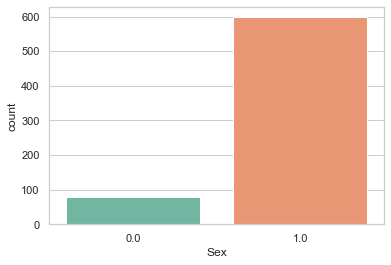

In [23]:
#Visualizing the distribution of variables
print(Dataset['Sex'].value_counts())
sns.countplot(x='Sex', data=Dataset, palette='Set2')
plt.show()

1.0    201
0.0    154
Name: Current_Smoking, dtype: int64


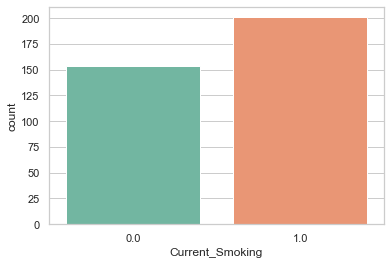

In [24]:
#Visualizing the distribution of variables
print(Dataset['Current_Smoking'].value_counts())
sns.countplot(x='Current_Smoking', data=Dataset, palette='Set2')
plt.show()

0.0    340
1.0    125
Name: Hospitalization_14_days_ago, dtype: int64


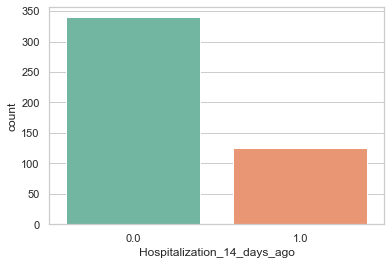

In [25]:
#Visualizing the distribution of variables
print(Dataset['Hospitalization_14_days_ago'].value_counts())
sns.countplot(x='Hospitalization_14_days_ago', data=Dataset, palette='Set2')
plt.show()

0    542
1    136
Name: Death, dtype: int64


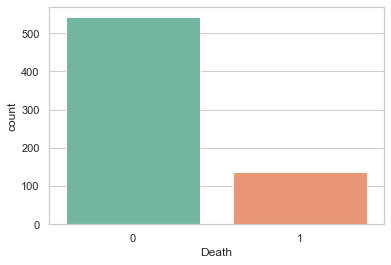

In [26]:
#Visualizing the distribution of variables
print(Dataset['Death'].value_counts())
sns.countplot(x='Death', data=Dataset, palette='Set2')
plt.show()

2.0    461
1.0    204
3.0      3
Name: ICU_admission, dtype: int64


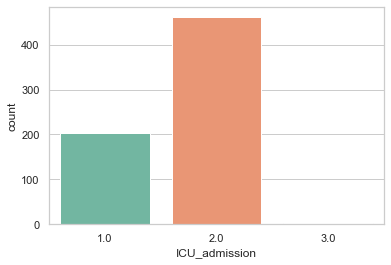

In [27]:
#Visualizing the distribution of variables
print(Dataset['ICU_admission'].value_counts())
sns.countplot(x='ICU_admission', data=Dataset, palette='Set2')
plt.show()

In [28]:
#Visualizing the Missing values of the whole Dataset
#msno.matrix(Dataset)

In [20]:
#Filling the dataset with the appropriate values
Dataset['Age'].fillna(Dataset["Age"].median(skipna=True), inplace=True)
Dataset['BMI'].fillna(Dataset["BMI"].mean(skipna=True), inplace=True)
Dataset['SystolicBP'].fillna(Dataset["SystolicBP"].mean(skipna=True), inplace=True)
Dataset['DiastolicBP'].fillna(Dataset["DiastolicBP"].median(skipna=True), inplace=True)
Dataset['Respiratory_rate'].fillna(Dataset["Respiratory_rate"].mean(skipna=True), inplace=True)
Dataset['Oxygen_Saturation_Percent'].fillna(Dataset["Oxygen_Saturation_Percent"].median(skipna=True), inplace=True)
Dataset['Total_Lung_Involvement_Percent'].fillna(Dataset["Total_Lung_Involvement_Percent"].mean(skipna=True), inplace=True)
Dataset['Total_Lung_Involvement_Rank'].fillna(Dataset["Total_Lung_Involvement_Rank"].mean(skipna=True), inplace=True)
Dataset['Sex'].fillna(1, inplace=True)
Dataset['Current_Smoking'].fillna(1, inplace=True)
Dataset['Hospitalization_14_days_ago'].fillna(0, inplace=True)
Dataset['ICU_admission'].fillna(2, inplace=True)

In [21]:
Dataset.isnull().sum()

Hospital_Name                     0
Age                               0
BMI                               0
Average_Daily_Use_Cigarettes      0
Hookah_Consumption                0
SystolicBP                        0
DiastolicBP                       0
Respiratory_rate                  0
Oxygen_Saturation_Percent         0
Intubation_Duration_Day           0
Total_Lung_Involvement_Percent    0
NIV_Duration_Day                  0
Total_Lung_Involvement_Rank       0
Sex                               0
Current_Smoking                   0
History_hookah                    0
Drug_history                      0
Sweating                          0
Fever                             0
Dyspnea                           0
Chestpain                         0
Abnormal_Lung_Signs               0
Diabetes                          0
Hypertension                      0
Cancers                           0
Cardiovascular_Disease            0
CKD                               0
COPD                        

In [22]:
Dataset.drop("Total_Lung_Involvement_Rank", axis=1, inplace = True)
Dataset.drop("Hookah_Consumption", axis=1, inplace = True)
Dataset.drop("ICU_admission", axis=1, inplace = True)
Dataset.drop("NIV_Duration_Day", axis=1, inplace = True)
Dataset.drop("Intubation_Duration_Day", axis=1, inplace = True)
Dataset.head()

,Hospital_Name,Age,BMI,Average_Daily_Use_Cigarettes,SystolicBP,DiastolicBP,Respiratory_rate,Oxygen_Saturation_Percent,Total_Lung_Involvement_Percent,Sex,...,Hypertension,Cancers,Cardiovascular_Disease,CKD,COPD,Immunosuppressant_Drugs,Antihypertensive_drug,Pantoprazole,Hospitalization_14_days_ago,Death
0,Imam Khomeini Complex,61.0,20.500000,0.0,122.422697,78.0,19.718638,91.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0.0,1
1,Shariati Hospital,74.0,26.700000,0.0,40.000000,75.0,16.000000,75.0,0.0,1.0,...,0,0,1,1,0,0,0,1,1.0,1
2,Baharlou Hospital,51.0,29.100000,0.0,122.422697,78.0,19.718638,91.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1.0,1
3,Baharlou Hospital,64.0,41.000000,0.0,136.000000,78.0,20.000000,95.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.0,0
4,Baharlou Hospital,20.0,26.148507,0.0,113.000000,76.0,19.000000,92.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.0,1


Optimal number of features : 20
Selected features: ['Abnormal_Lung_Signs', 'Antihypertensive_drug', 'CKD', 'COPD', 'Cancers', 'Cardiovascular_Disease', 'Chestpain', 'Current_Smoking', 'Diabetes', 'Drug_history', 'Dyspnea', 'Fever', 'History_hookah', 'Hospitalization_14_days_ago', 'Hypertension', 'Immunosuppressant_Drugs', 'Oxygen_Saturation_Percent', 'Pantoprazole', 'Sex', 'Sweating']


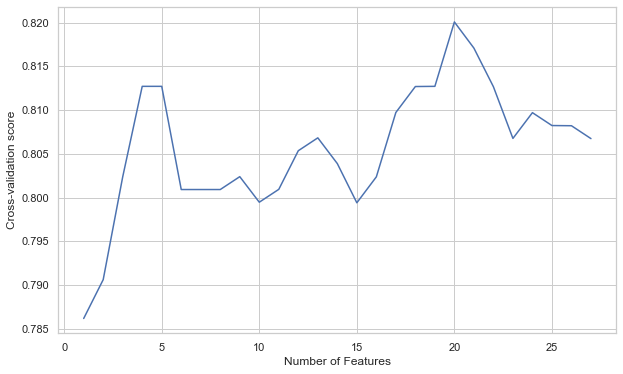

In [26]:
#Revealing the optimal number of features and the features names using RFECV with logistic algorithm
X = Dataset[Dataset.columns.difference(["Death", "Hospital_Name"])] 
Y = Dataset["Death"]

rfecv = RFECV(estimator=LogisticRegression(max_iter=10000, random_state=5), step=1, cv=10, scoring="accuracy")
rfecv.fit(X,Y)
print("Optimal number of features : %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of Features")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) +1), rfecv.cv_results_["mean_test_score"])
plt.show()

In [33]:
#Determining the Best parameters for random forest
randomf = RandomForestClassifier(random_state=5)
parameters = {
    "n_estimators" : [5,10,50,100,250,500,1000],
    "max_depth" : [2,4,8,16,32,None]
}

cv = GridSearchCV(randomf, parameters, cv=10)
cv.fit(X,Y.values.ravel())

def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display_results(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 1000}


0.822 + or -0.047 for the {'max_depth': 2, 'n_estimators': 5}
0.808 + or -0.014 for the {'max_depth': 2, 'n_estimators': 10}
0.807 + or -0.012 for the {'max_depth': 2, 'n_estimators': 50}
0.805 + or -0.011 for the {'max_depth': 2, 'n_estimators': 100}
0.808 + or -0.017 for the {'max_depth': 2, 'n_estimators': 250}
0.808 + or -0.017 for the {'max_depth': 2, 'n_estimators': 500}
0.808 + or -0.017 for the {'max_depth': 2, 'n_estimators': 1000}
0.83 + or -0.048 for the {'max_depth': 4, 'n_estimators': 5}
0.825 + or -0.037 for the {'max_depth': 4, 'n_estimators': 10}
0.832 + or -0.027 for the {'max_depth': 4, 'n_estimators': 50}
0.829 + or -0.026 for the {'max_depth': 4, 'n_estimators': 100}
0.829 + or -0.028 for the {'max_depth': 4, 'n_estimators': 250}
0.827 + or -0.031 for the {'max_depth': 4, 'n_estimators': 500}
0.83 + or -0.034 for the {'max_depth': 4, 'n_estimators': 1000}
0.819 + or -0.052 for the {'max_depth': 8, 'n_est

Optimal number of features : 18
Selected features: ['Abnormal_Lung_Signs', 'Age', 'Average_Daily_Use_Cigarettes', 'BMI', 'CKD', 'Cancers', 'DiastolicBP', 'Drug_history', 'Dyspnea', 'Fever', 'Hospitalization_14_days_ago', 'Hypertension', 'ICU_admission', 'Intubation_Duration_Day', 'Oxygen_Saturation_Percent', 'Pantoprazole', 'Respiratory_rate', 'SystolicBP']


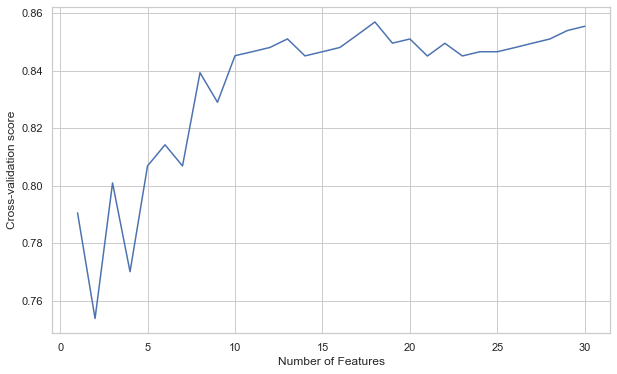

In [40]:
#Revealing the optimal number of features and the features names using RFECV with Random Forest algorithm
rfecv = RFECV(estimator= RandomForestClassifier(max_depth=16, n_estimators = 1000,random_state=5), step=1, cv=10, scoring="accuracy")
rfecv.fit(X,Y)

print("Optimal number of features : %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of Features")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) +1), rfecv.cv_results_["mean_test_score"])
plt.show()

In [35]:
#Determining the Best parameters for Gradient Boosting
gb = GradientBoostingClassifier(random_state=5)
parameters = {
    "n_estimators" : [5,10,50,100,250,500,1000],
    "max_depth" : [2,4,8,16,32,None],
    "learning_rate": [0.01, 0.1, 0.001],
}

cv = GridSearchCV(gb, parameters, cv=10)
cv.fit(X,Y.values.ravel())

def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display_results(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}


0.799 + or -0.007 for the {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 5}
0.799 + or -0.007 for the {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10}
0.799 + or -0.007 for the {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}
0.811 + or -0.031 for the {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
0.844 + or -0.036 for the {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 250}
0.845 + or -0.044 for the {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
0.841 + or -0.045 for the {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000}
0.799 + or -0.007 for the {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 5}
0.799 + or -0.007 for the {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 10}
0.802 + or -0.021 for the {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
0.826 + or -0.039 for the {'learning_rate': 0.01, 'max_

Optimal number of features : 4
Selected features: ['Age', 'CKD', 'ICU_admission', 'Intubation_Duration_Day']


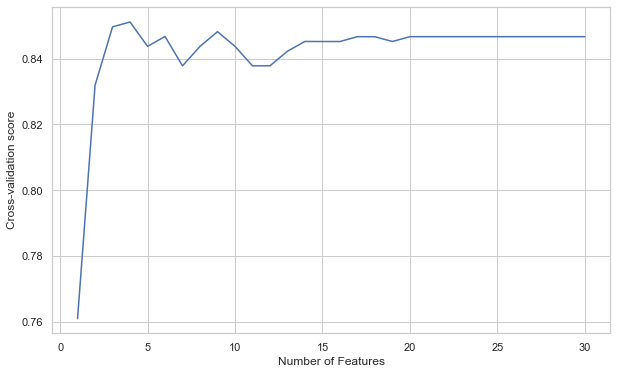

In [41]:
#RFECV using Gradient boosting
gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth =2, n_estimators=50,random_state=5)
rfecv = RFECV(gb, step=1, cv=10, scoring="accuracy")
rfecv.fit(X,Y)

print("Optimal number of features : %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of Features")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) +1), rfecv.cv_results_["mean_test_score"])
plt.show()

Age                             0.094889
Oxygen_Saturation_Percent       0.089466
CKD                             0.071372
Respiratory_rate                0.069317
DiastolicBP                     0.062817
SystolicBP                      0.059209
BMI                             0.055558
Cancers                         0.041596
Average_Daily_Use_Cigarettes    0.032914
Fever                           0.032489
Pantoprazole                    0.031100
Abnormal_Lung_Signs             0.030746
Drug_history                    0.029692
Current_Smoking                 0.029253
Diabetes                        0.028891
Cardiovascular_Disease          0.028743
Dyspnea                         0.028439
Hospitalization_14_days_ago     0.027931
Hypertension                    0.025238
Antihypertensive_drug           0.024709
dtype: float64

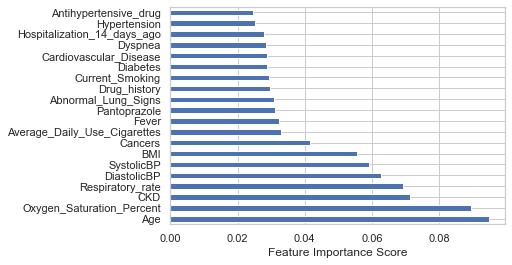

In [27]:
#Revealing the top 20 best features based on their impact on the target variable using feature importance
#Extra trees Classifier
ft_importance_model = ExtraTreesClassifier(random_state=5)
ft_importance_model.fit(X,Y)
ft_importance = pd.Series(ft_importance_model.feature_importances_, index = X.columns)
ft_importance.nlargest(20).plot(kind="barh")
plt.xlabel("Feature Importance Score")
ft_importance.nlargest(20)

CKD                             0.224291
Age                             0.209232
Oxygen_Saturation_Percent       0.173191
DiastolicBP                     0.115786
BMI                             0.071084
Cancers                         0.061432
Hypertension                    0.040366
Cardiovascular_Disease          0.031514
Hospitalization_14_days_ago     0.030089
Abnormal_Lung_Signs             0.017855
Average_Daily_Use_Cigarettes    0.013852
Pantoprazole                    0.011308
Antihypertensive_drug           0.000000
COPD                            0.000000
Chestpain                       0.000000
Current_Smoking                 0.000000
Diabetes                        0.000000
Drug_history                    0.000000
Dyspnea                         0.000000
Fever                           0.000000
dtype: float64

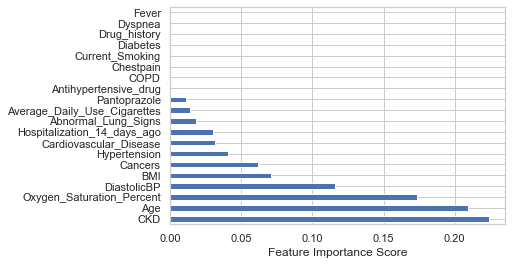

In [28]:
#Revealing the top 20 best features based on their impact on the target variable using feature importance
#Random Forest
ft_importance_model = RandomForestClassifier(max_depth=2, n_estimators = 10,random_state=5)
ft_importance_model.fit(X,Y)
ft_importance = pd.Series(ft_importance_model.feature_importances_, index = X.columns)
ft_importance.nlargest(20).plot(kind="barh")
plt.xlabel("Feature Importance Score")
ft_importance.nlargest(20)

Age                               0.198079
Oxygen_Saturation_Percent         0.148086
CKD                               0.118118
BMI                               0.075904
Respiratory_rate                  0.073889
DiastolicBP                       0.054683
SystolicBP                        0.047518
Cancers                           0.045814
Pantoprazole                      0.032166
Average_Daily_Use_Cigarettes      0.030259
Hypertension                      0.027406
Abnormal_Lung_Signs               0.025911
Drug_history                      0.022757
Sex                               0.018052
Total_Lung_Involvement_Percent    0.017154
Hospitalization_14_days_ago       0.016933
Current_Smoking                   0.010362
Cardiovascular_Disease            0.008232
COPD                              0.005651
Diabetes                          0.005627
dtype: float64

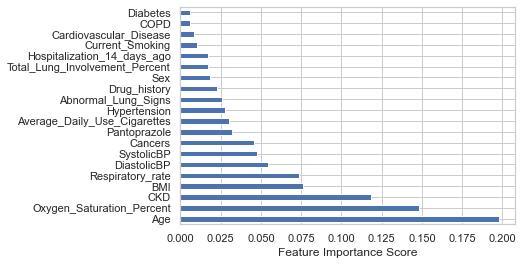

In [29]:
#Revealing the top 20 best features based on their impact on the target variable using feature importance
#Gradient Boosting
ft_importance_model = GradientBoostingClassifier(random_state=5)
ft_importance_model.fit(X,Y)
ft_importance = pd.Series(ft_importance_model.feature_importances_, index = X.columns)
ft_importance.nlargest(20).plot(kind="barh")
plt.xlabel("Feature Importance Score")
ft_importance.nlargest(20)